[`galpy`](https://docs.galpy.org/en/v1.9.1/index.html) is a Python package for galactic dynamics. We will be using this in the following examples, so here will be a quick overview of the basic functions of `galpy`.

# Galactic Potentials

To calculate the dynamics of stars, a graviatation potential is needed. `galpy` includes a large number of potentials that one could you to represent a galaxy. For all of these examples, we will use the potential `MWPotential2014`, which fits the rotation curve of the Milky Way. Below is how you import the potential and plot its rotation curve.

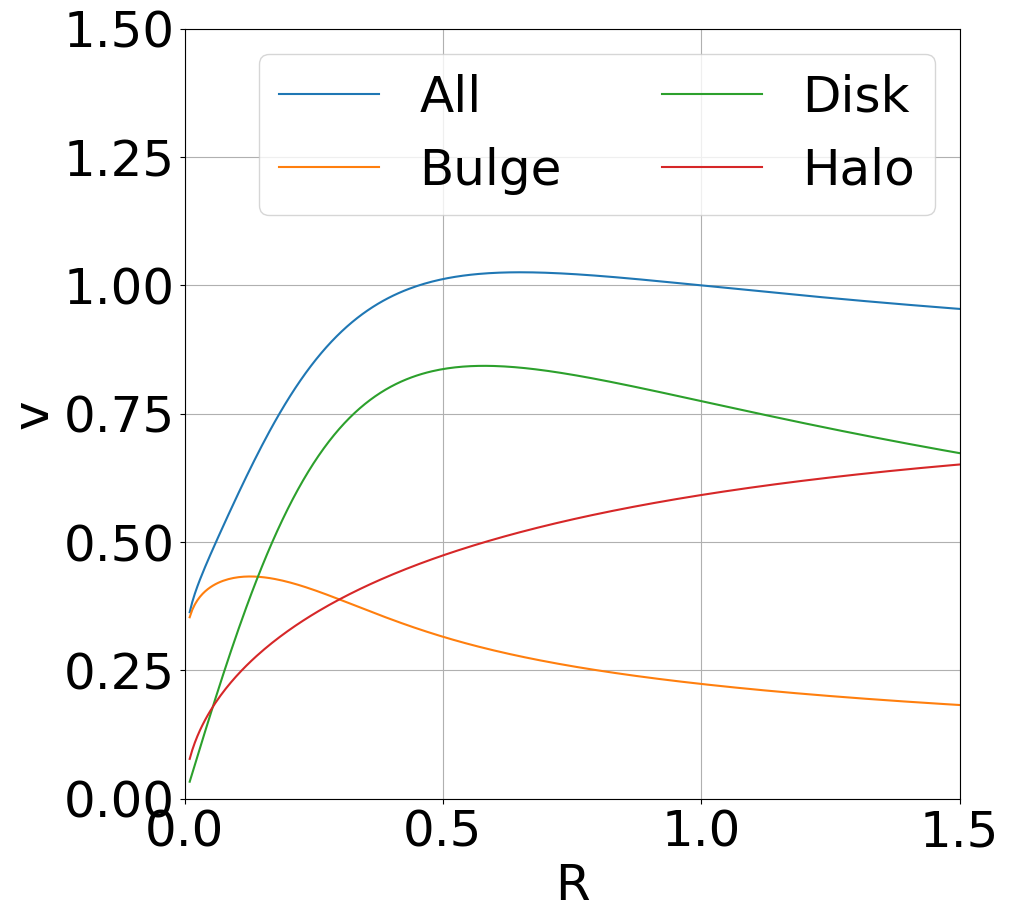

In [1]:
# import potential
from galpy.potential import MWPotential2014
# import plotting function for rotation curve
from galpy.potential import plotRotcurve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plotRotcurve(MWPotential2014,label='All', overplot=True)
plotRotcurve(MWPotential2014[0],label='Bulge',overplot=True)
plotRotcurve(MWPotential2014[1],label='Disk',overplot=True)
plotRotcurve(MWPotential2014[2],label='Halo',overplot=True)
plt.grid()
plt.ylim((0, 1.5))
plt.xlim((0, 1.5))
plt.legend(ncols=2)
plt.xlabel('R')
plt.ylabel('v')
plt.show()

The above demonstrates two things about `galpy`. First, all potentials are additive. For example, this Milky Way potential contrains three components; a bulge, a disk and a halo. This makes it convientient to add together multiple potentials to create a single one for a galaxy. Second, this demonstrates that by default all outputs from `galpy` are in dimensionless units! It is normalized such that $v = 1$ at $R = 1$, where $R = 1$ is the Solar radius. Below we will show how to convert to physical units.

# Orbit Integration

Another main feature of `galpy` is that you can integrate the orbit of a star with some initial velocity in some gravitational potential. If using a 3D  potential, then the orbit object must be given an array of `[R,vR,vT,z,vz,phi]`. Again, these need to be in dimensionless units by default! Below is an example for a typical disk star in the Solar Neighborhood.

In [2]:
from galpy.orbit import Orbit
import numpy as np
import astropy.units as u

# initialize the orbit
o = Orbit([1.,   # R
           0.1,  # vR
           1.1,  # vT
           0.,   # z
           0.1,  # vZ
           0.    # phi
            ],
          ro=8, vo=220)
# integrate the orbit
ts = np.linspace(0., 1., 1001) * u.Gyr
o.integrate(ts, MWPotential2014)

With the star now integrated in our potential, we can make some plots! These can be accessed through the `Orbit` object and can be converted to physical units by setting `use_physical = True`. This will then convert to physical units using the values we provided when initilizing the orbit object ($R_0 = 8$ kpc and $v_0 = 220$ km/s).

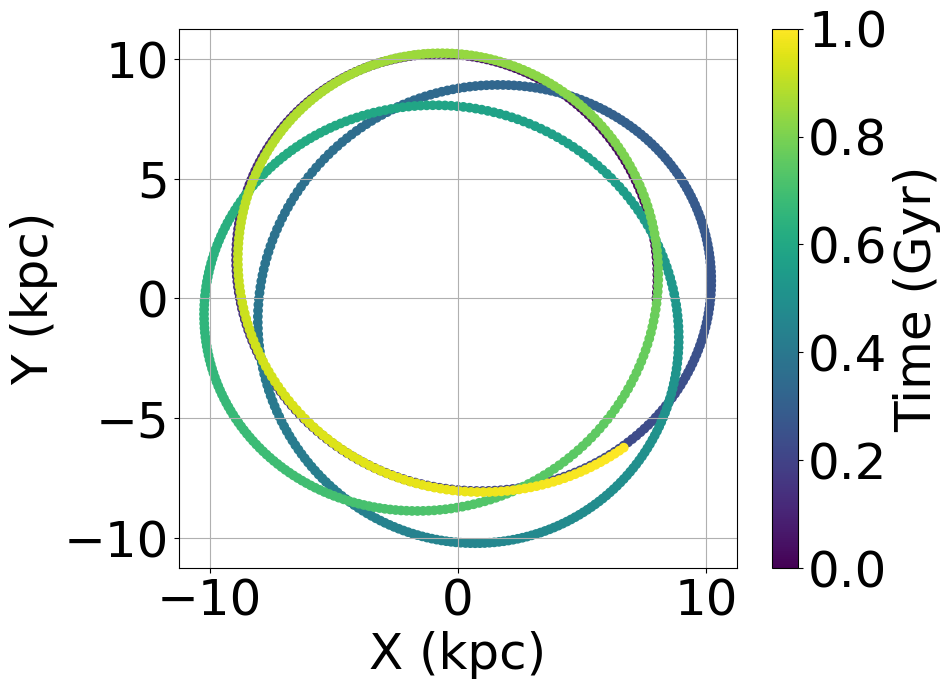

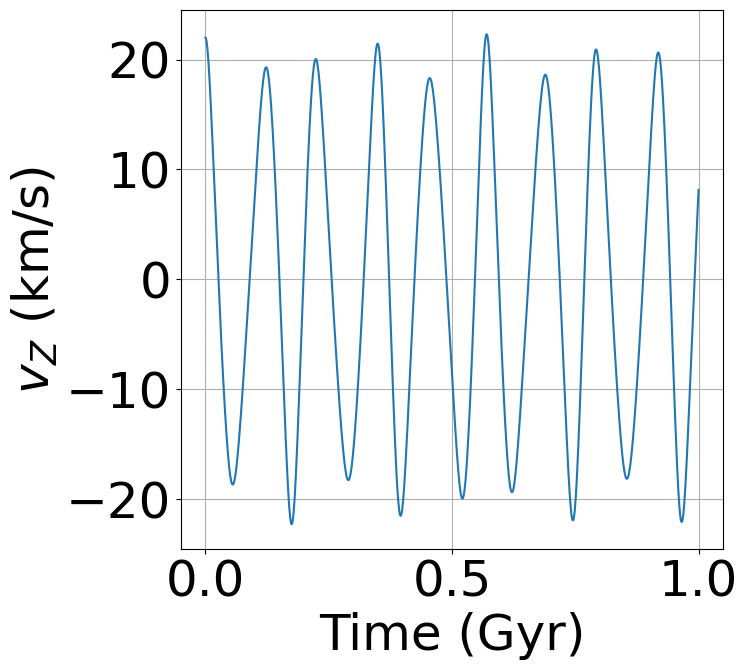

In [3]:
# plot the orbit over time
plt.figure(figsize=(9, 7))
plt.scatter(o.x(ts, use_physical=True),
            o.y(ts, use_physical=True),
            c=ts.value)
plt.colorbar(label='Time (Gyr)')
plt.grid()
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.show()

plt.figure(figsize=(7, 7))
plt.plot(ts.value,
         o.vz(ts, use_physical=True))
plt.grid()
plt.xlabel('Time (Gyr)')
plt.ylabel(r'$v_Z$ (km/s)')
plt.show()

# Synergy with Astropy

What is also great about `galpy` is plays nice with `astropy`! This means you can provide just sky coordinates, parallax, proper motion and proper motion via an `astropy` objects, and `galpy` will calculate the galactic position and velocities for you.

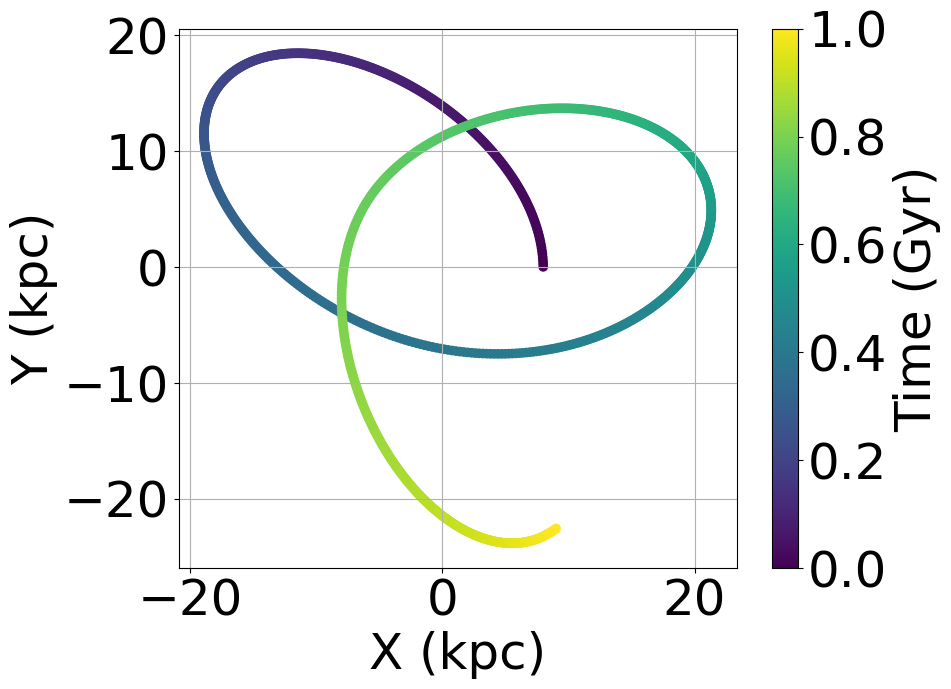

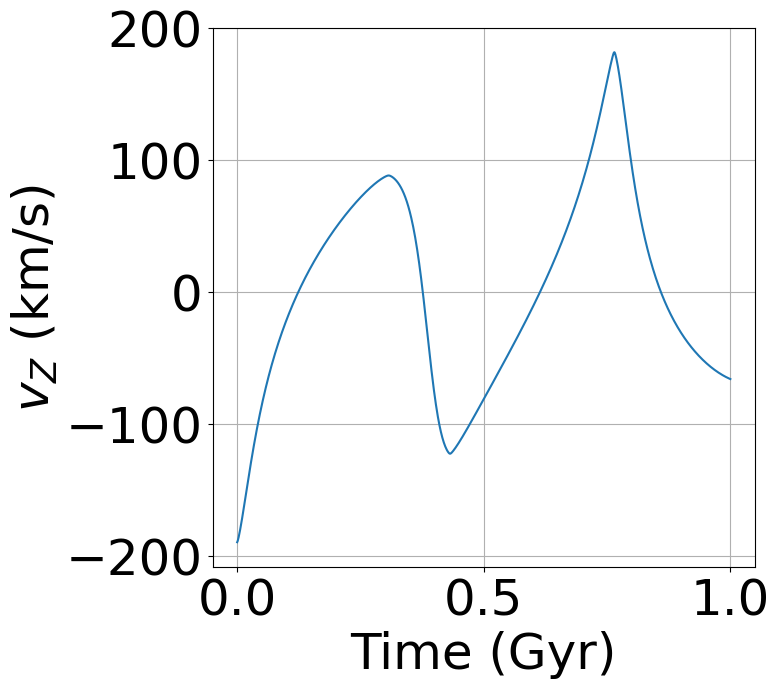

In [4]:
from astropy.coordinates import SkyCoord

# create sky coordinate
c = SkyCoord(ra=10. * u.deg,
             dec=-20. * u.deg,
             distance=100. * u.pc,
             pm_ra_cosdec=-10. * u.mas/u.yr,
             pm_dec=20. * u.mas/u.yr,
             radial_velocity=200.*u.km/u.s)
# integrate orbit
o = Orbit(c, ro=8, vo=220)
o.integrate(ts, MWPotential2014)

# plot the orbit over time
plt.figure(figsize=(9, 7))
plt.scatter(o.x(ts, use_physical=True),
            o.y(ts, use_physical=True),
            c=ts.value)
plt.colorbar(label='Time (Gyr)')
plt.grid()
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.show()

plt.figure(figsize=(7, 7))
plt.plot(ts.value,
         o.vz(ts, use_physical=True))
plt.grid()
plt.xlabel('Time (Gyr)')
plt.ylabel(r'$v_Z$ (km/s)')
plt.show()